<a href="https://colab.research.google.com/github/fabulousengineer0211/ImageClassification/blob/main/ImageClassificationCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(train_x,train_y),(test_x,test_y) = cifar10.load_data()

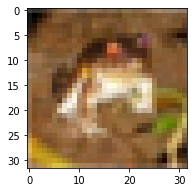

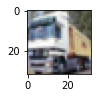

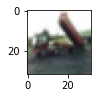

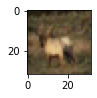

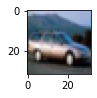

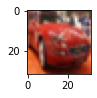

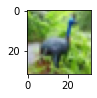

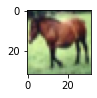

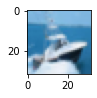

In [6]:
n = 9
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_x[i])
  plt.show()
  




In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [8]:
type(train_x) #Present datatype of train_x and now we'll convert it to float32 so as to vary it as probability functionbetween 0 and 1.

numpy.ndarray

In [9]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x= train_x/255.0
test_x = test_x/255.0  #So here we have converted the datatype to float32 and by dividing it by 255 we are varying it in between 0 and 1.



In [10]:
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)


In [11]:
num_classes=test_y.shape[1]


In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (32,32,3),padding = 'same',activation = 'relu', kernel_constraint = max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu', kernel_constraint = max_norm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))


In [13]:
sgd = SGD(lr = 0.1, momentum = 0.9, decay = 0.1/25)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = 'accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [17]:
model.fit(train_x,train_y, validation_data=(test_x,test_y), epochs=50,batch_size=60 )

Epoch 1/50
834/834 [==============================] - 6s 7ms/step - loss: 0.9960 - accuracy: 0.6478 - val_loss: 1.1661 - val_accuracy: 0.5907
Epoch 2/50
834/834 [==============================] - 6s 7ms/step - loss: 0.9603 - accuracy: 0.6594 - val_loss: 1.1607 - val_accuracy: 0.5904
Epoch 3/50
834/834 [==============================] - 6s 7ms/step - loss: 0.9169 - accuracy: 0.6737 - val_loss: 1.1863 - val_accuracy: 0.5888
Epoch 4/50
834/834 [==============================] - 6s 7ms/step - loss: 0.8821 - accuracy: 0.6882 - val_loss: 1.1691 - val_accuracy: 0.5950
Epoch 5/50
834/834 [==============================] - 6s 7ms/step - loss: 0.8500 - accuracy: 0.6987 - val_loss: 1.1529 - val_accuracy: 0.5997
Epoch 6/50
834/834 [==============================] - 6s 7ms/step - loss: 0.8324 - accuracy: 0.7064 - val_loss: 1.1388 - val_accuracy: 0.6062
Epoch 7/50
834/834 [==============================] - 6s 7ms/step - loss: 0.7934 - accuracy: 0.7185 - val_loss: 1.0932 - val_accuracy: 0.6276
Epoch 

In [18]:
_,acc = model.evaluate(test_x,test_y)
print(acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.2221 - accuracy: 0.6535
65.35000205039978
